In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

## Loading data

In [2]:
import pandas as pd
import os

parent_directory = os.path.abspath(os.path.join(os.getcwd(), ".."))


train_data = pd.read_csv(parent_directory+"/data/twitter_training.csv")
val_data = pd.read_csv(parent_directory+"/data/twitter_validation.csv")

print("Shape of training and validation dataset:")
print("Train: ",train_data.shape)
print("Val:   ",val_data.shape)

train_data.columns = ['ID', 'Category', 'Sentiment', 'Tweet']
val_data.columns = ['ID', 'Category', 'Sentiment', 'Tweet']

Shape of training and validation dataset:
Train:  (74681, 4)
Val:    (999, 4)


## Data cleaning

In [5]:
print("Training data:")
#number of missing entries in each column
print(train_data.isna().sum())
#Number of duplicated rows
print("num of duplicate rows: ",train_data.duplicated().sum())

print("")
print("Validation data:")
#number of missing entries in each column
print(val_data.isna().sum())
#Number of duplicated rows
print("num of duplicate rows: ",val_data.duplicated().sum())

# clean up data and show new shape
train_data.dropna(inplace=True)
train_data.drop_duplicates(inplace=True)


Training data:
ID           0
Category     0
Sentiment    0
Tweet        0
dtype: int64
num of duplicate rows:  0

Validation data:
ID           0
Category     0
Sentiment    0
Tweet        0
dtype: int64
num of duplicate rows:  0


## Data Vizualization:

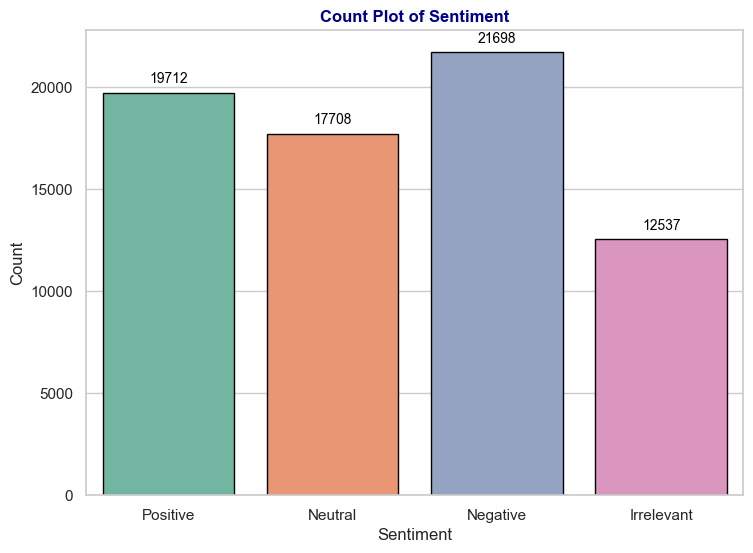

In [7]:
positive_sentiment_data= train_data[train_data['Sentiment'] == 'Positive']
positive_tweets = positive_sentiment_data['Tweet']

negative_sentiment_data = train_data[train_data['Sentiment'] == 'Negative']
negative_tweets = negative_sentiment_data['Tweet']

neutral_sentiment_data = train_data[train_data['Sentiment'] == 'Neutral']
neutral_tweets = neutral_sentiment_data['Tweet']

irrelavent_sentiment_data= train_data[train_data['Sentiment'] == 'Irrelevant']
irrelavent_tweets = irrelavent_sentiment_data['Tweet']

plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")
ax = sns.countplot(data=train_data, x='Sentiment', palette="Set2", edgecolor="black")
plt.title(f'Count Plot of Sentiment', fontweight='bold', color='darkblue')
plt.ylabel("Count", fontsize=12)
for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', 
                    xytext=(0, 5), textcoords='offset points', fontsize=10, color='black')
plt.tight_layout(pad=2)
plt.show()

In [8]:
pd.crosstab(train_data['Sentiment'] , train_data['Category']).T.style.background_gradient(subset=['Negative'],cmap='Reds')\
.background_gradient(subset=['Positive'] , cmap='Greens')\
.background_gradient(subset=['Neutral'] , cmap='Blues')\
.background_gradient(subset=['Irrelevant'] , cmap='Greys')

Sentiment,Irrelevant,Negative,Neutral,Positive
Category,,,,
Amazon,185,565,1197,302
ApexLegends,185,574,913,606
AssassinsCreed,256,365,153,1382
Battlefield,907,445,342,561
Borderlands,238,415,581,971
CS-GO,620,335,523,717
CallOfDuty,660,861,367,426
CallOfDutyBlackopsColdWar,545,540,340,817
Cyberpunk2077,457,360,456,902
